## Predicting the selling price of a residential property

* The exercise is part of Microsoft DP-100 training challenges

* Dataset Originates from the following study
  Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.

  It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science).

# Variables
* transaction_date - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* house_age - the house age (in years)
* transit_distance - the distance to the nearest light rail station (in meters)
* local_convenience_stores - the number of convenience stores within walking distance
* latitude - the geographic coordinate, latitude
* longitude - the geographic coordinate, longitude
* price_per_unit house price of unit area (3.3 square meters)

In [13]:

import pandas as pd

# load the training dataset
re_data = pd.read_csv('real_estate.csv')
re_data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [21]:
re_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [22]:
re_data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Looking at the price_per_unit 75% and max suggest that there are likely outlier. Check for the distributions

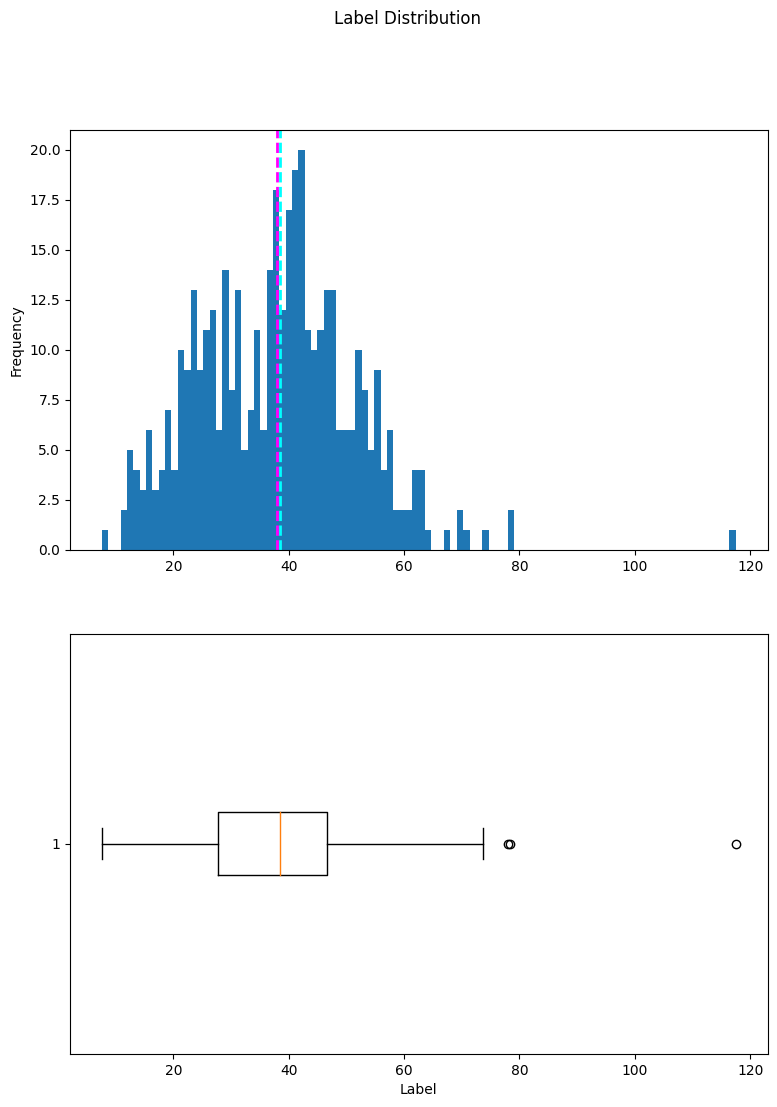

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Get the label column --> price_per_unit
label = re_data["price_per_unit"]

# Figure with two subplots.
# Position [0] will have an hist withe the label frequency
# Position[1] boxplot with the label data (distribution)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()

In [15]:
# some outliers (price_per_unit >70), that should be removed before proceeding and the distibution is close to normal.
# Mean and median values close to eachother



In [35]:
# removing the outliers

re_data = re_data[re_data['price_per_unit']<70]

# new label data with the outliers removed
label = re_data["price_per_unit"]

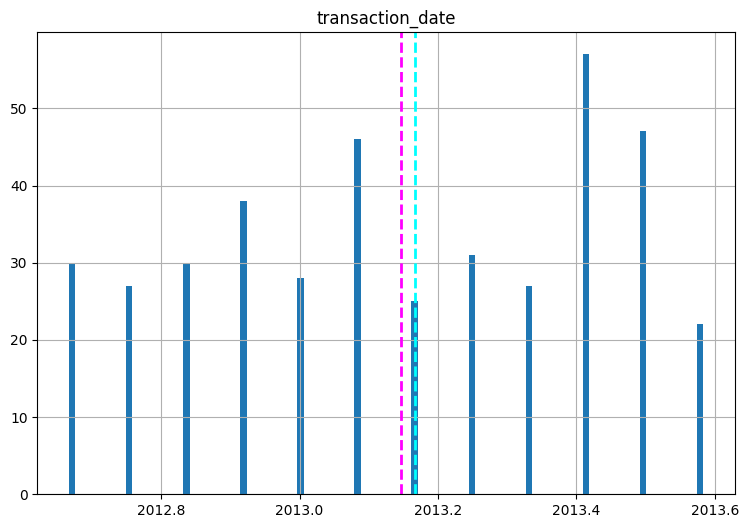

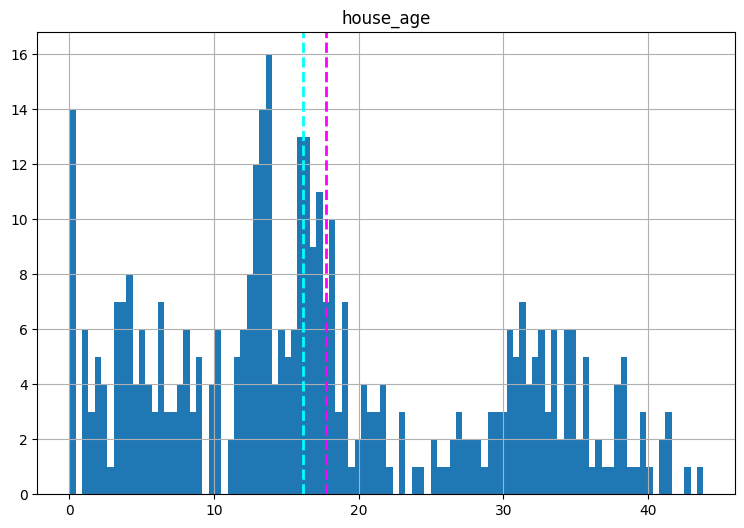

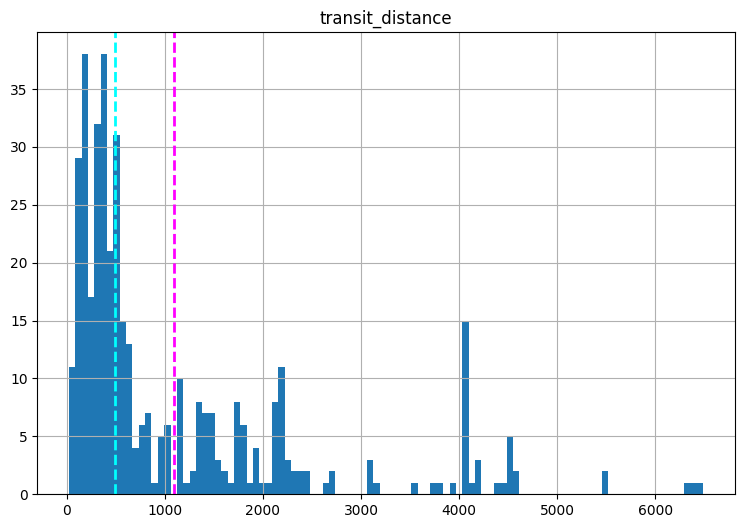

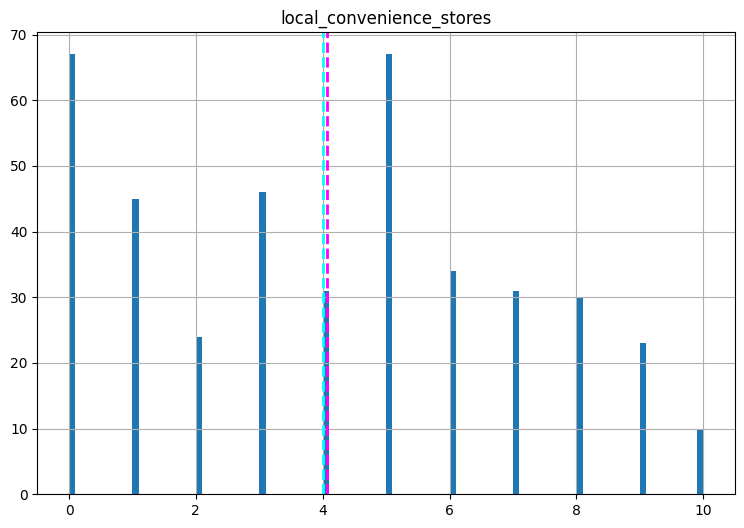

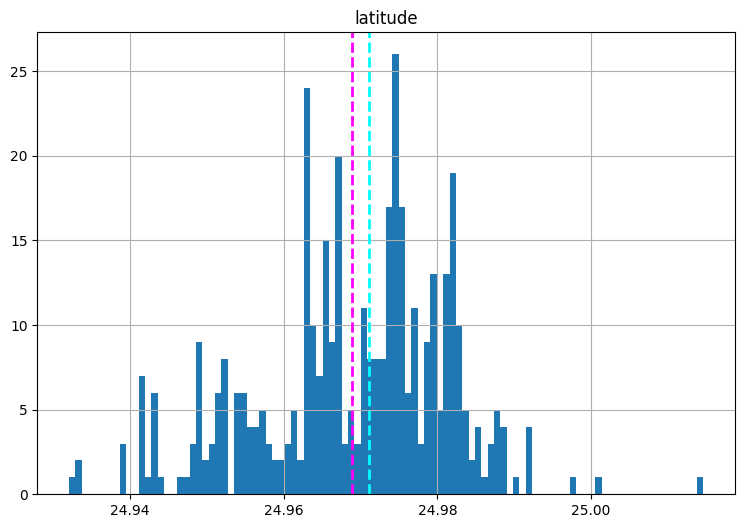

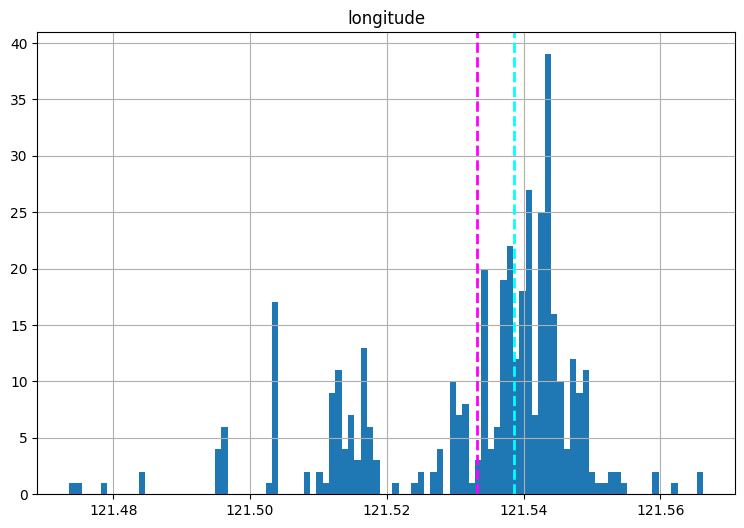

In [36]:
# Plot a histogram for each numeric feature
for col in re_data[re_data.columns[0:-1]]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = re_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

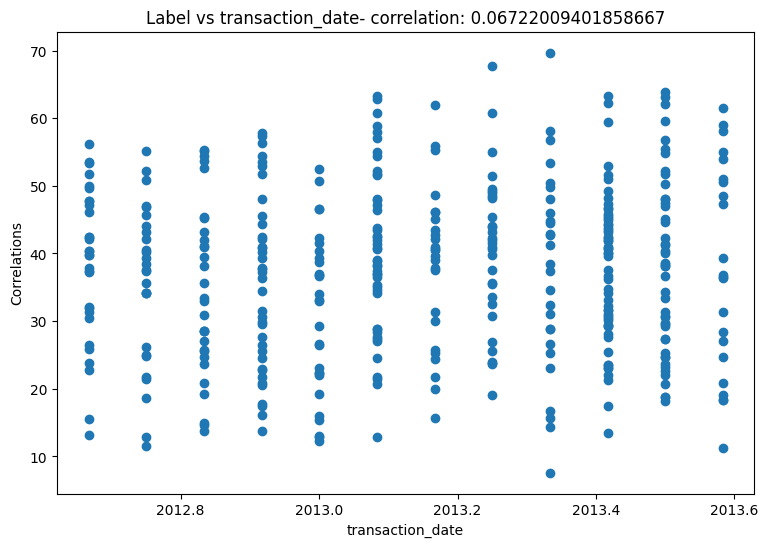

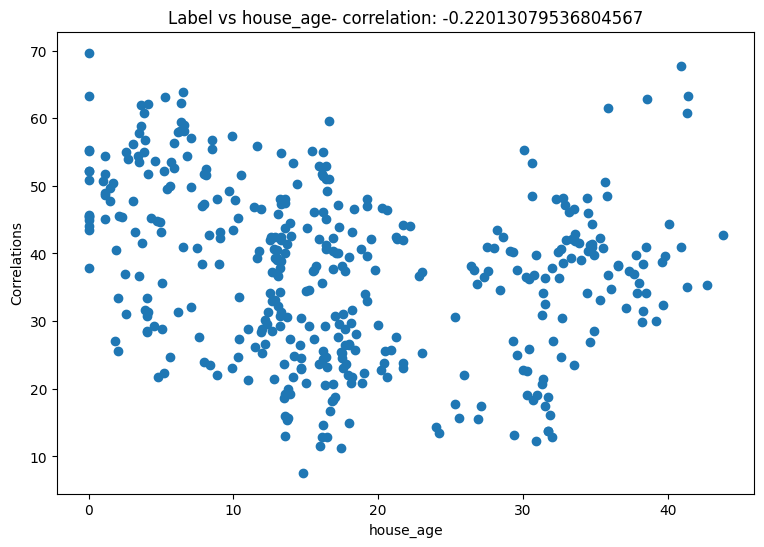

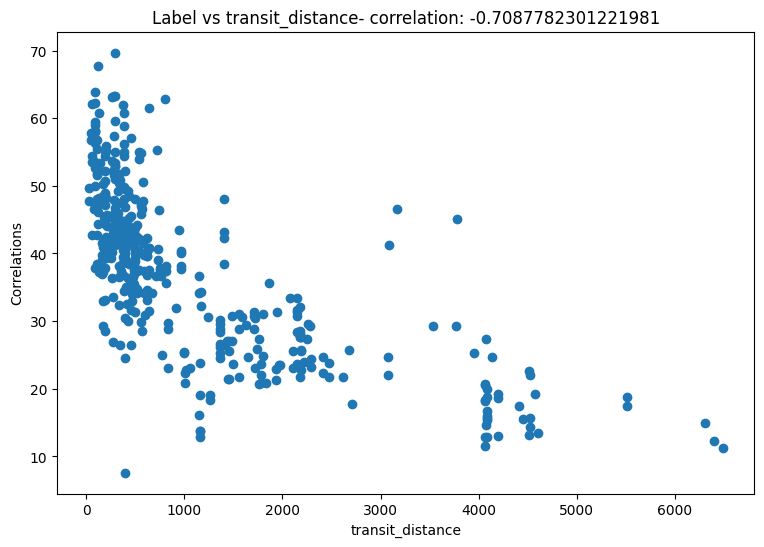

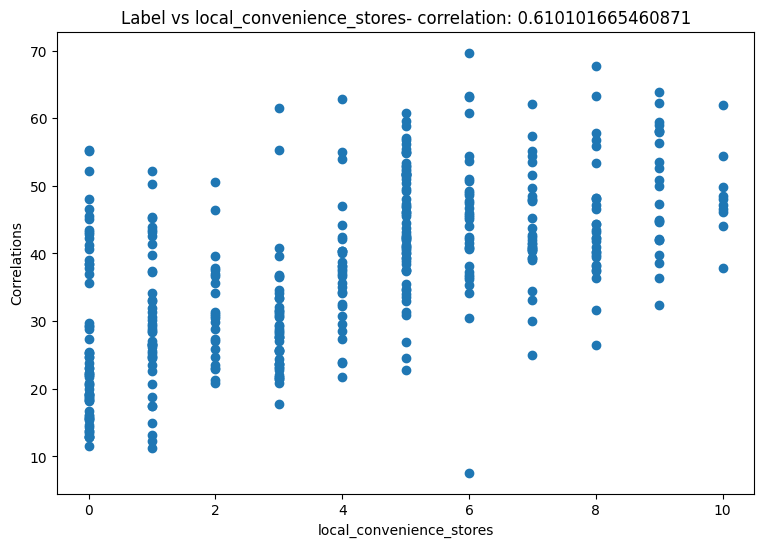

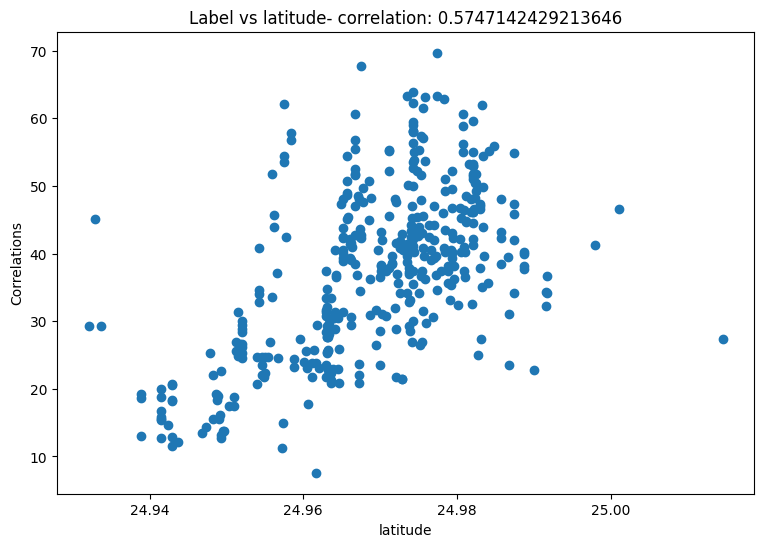

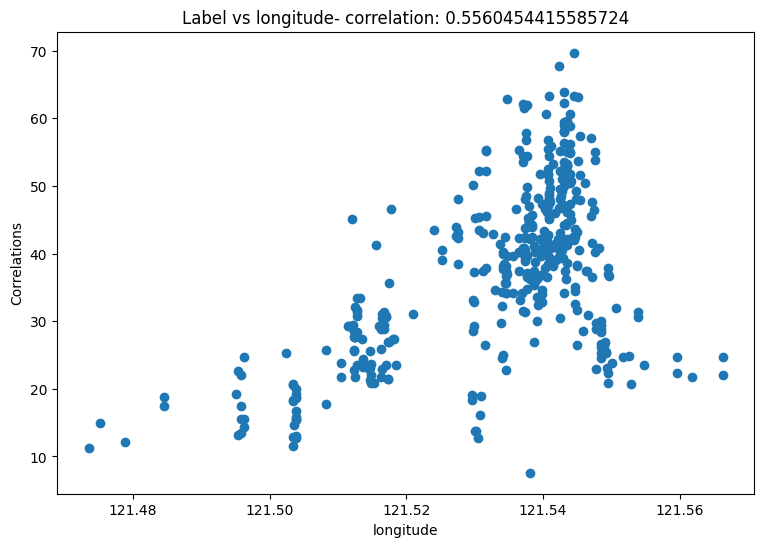

In [37]:
# the data is distributed for most variables, with exception of longitude/latiture which makes sence.
# transaction date is likely not important, it should be excluded

for col in re_data[re_data.columns[0:-1]]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = re_data[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    ax.set_title('Label vs ' + col + '- correlation: ' + str(correlation))
plt.show()

In [38]:
# correlation analysis confirms that transation date should be removed.
# There also does not seem to be a strong correlation between unit price and age.

# creating training/test data sets excluding only the information on the transaction date
# the last column is the label column and should also be excluded from the features (X)

from sklearn.model_selection import train_test_split
X, y = re_data[re_data.columns[1:-1]].values, re_data[re_data.columns[-1]].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 285, rows
Test Set: 123 rows


Normalize the numeric features before proceeding
These should be nromalized using the training data and than the same transformation is applied to the test data

Use a **RandomForestRegressor** to trainn the model. Use pipeline to put all steps together

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,2,3,4] # house_age, transit_distance, local_convinence_stores, latitude and longitude
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4])])),
                ('regressor', RandomForestRegressor())])


In [40]:
# make predictions using the test data

predictions = model.predict(X_test)

In [41]:
# evaluate the model using 3 mtrics: MSE, RMSE and R2

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 37.034523441452066
RMSE: 6.085599678047519
R2: 0.683982738654294


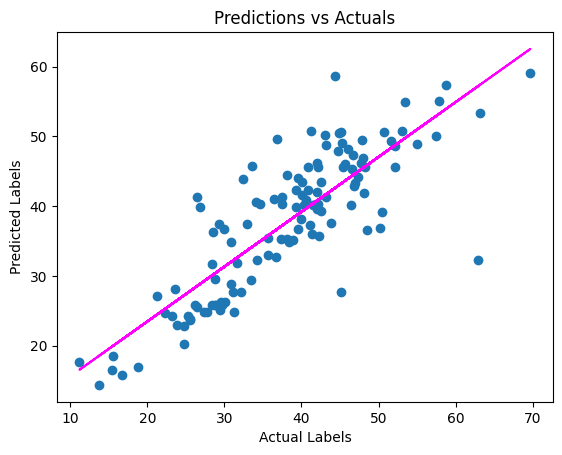

In [42]:
# visualize the ground truth vs prediction for the random forest model
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [43]:
# use the trained model to predict on the two new houses:
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

results = model.predict(X_new)
print(results)

[48.93306667 16.51616667]
